In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbs
%matplotlib inline



In [2]:
features = pd.read_csv("../data/xtrain.txt", sep='\t', header=None).T
features.columns = features.iloc[0]
features = features.drop(0, axis=0)
features = features.apply(pd.to_numeric, errors='raise')

print("Data types for x_train :")
print(features.dtypes.unique())


targets = pd.read_csv("../data/ytrain.txt", sep="\t", header=None)

Data types for x_train :
[dtype('float64')]


In [3]:
print("Features shape : ", features.shape,"\nTargets shape", targets.shape)

Features shape :  (184, 4654) 
Targets shape (184, 1)


In [4]:
from sklearn.manifold import TSNE

In [5]:
index_positive = targets[targets[0]==1].index 
index_negative = targets[targets[0]==-1].index

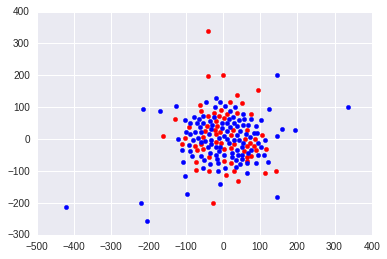

In [6]:
model = TSNE(n_components=2, random_state=0)
tsne = model.fit_transform(features)


xsne = [feat[0] for feat in tsne]
ysne = [feat[1] for feat in tsne]

xsne_pos = [xsne[i] for i in index_positive]
ysne_pos = [ysne[i] for i in index_positive]


xsne_neg = [xsne[i] for i in index_negative]
ysne_neg = [ysne[i] for i in index_negative]


plt.figure()
plt.scatter(x=xsne_pos, y=ysne_pos, color="red")
plt.scatter(x=xsne_neg, y=ysne_neg, color="blue")

plt.show()

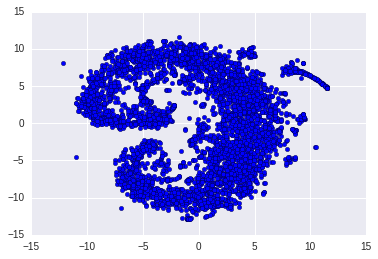

In [7]:
model = TSNE(n_components=2, random_state=0)
tsne = model.fit_transform(features.T)

xsne = [feat[0] for feat in tsne]
ysne = [feat[1] for feat in tsne]

plt.figure()
plt.scatter(x=xsne, y=ysne)
plt.show()

In [18]:
from sklearn.svm import LinearSVC


clf = LinearSVC(dual=True, loss='l1')

c_list = [10**-8,10**-7,10**-6, 10**-5, 10**-4,10**-3,10**-2,10**-1,10,10**2,10**3,10**4]
coeffs = []
for C in c_list:
    clf.fit(features, targets)
    coeffs.append(clf.coef_)
    



/usr/local/lib/python3.5/dist-packages/sklearn/svm/classes.py:199: DeprecationWarning: loss='l1' has been deprecated in favor of loss='hinge' as of 0.16. Backward compatibility for the loss='l1' will be removed in 1.0
  DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


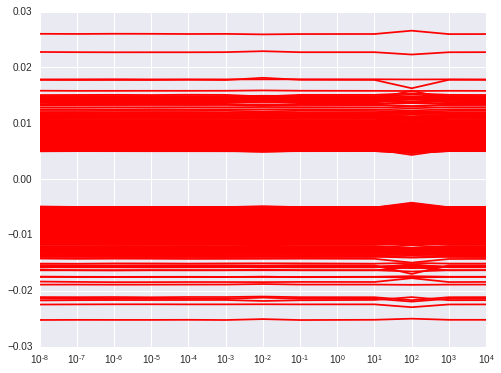

788

In [61]:
plt.figure()
num_c = len(c_list)
num_coeff = features.shape[1]

plt.figure(figsize=(8,6))
ax = plt.gca()
ax.set_xscale('log')

index_correct = []
seuil = [0.005,-0.005]
for index_coeff in range(num_coeff):
    coeff = coeffs[num_c - 1][0]
    coeff = coeff[index_coeff]
    #print(coeff)
    if (coeff > seuil[0]) or (coeff < seuil[1]):
        index_correct.append(index_coeff)
    
        
for index_coeff in index_correct:
    current_coeffs = []
    for index_c in range(num_c):
        current_coeffs.append(coeffs[index_c][0][index_coeff])
    
    ax.plot(c_list, current_coeffs, 'r')
    
plt.show()
len(index_correct)
